# Lab | Cleaning numerical data 

## Import the necessary libraries.

In [1]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# Sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

## Get Data

In [2]:
variable_customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

## Exploratory data analysis (EDA)

In [3]:
variable_customer_df.shape

(9134, 24)

In [4]:
variable_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
variable_customer_df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [6]:
variable_customer_df.isna().sum()/len(variable_customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

## Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [7]:
variable_customer_df.columns
column_names = variable_customer_df.columns
column_names

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
cols = []
for column in variable_customer_df.columns:
    cols.append(column.lower().replace(' ','_'))
cols
variable_customer_df.columns = cols

variable_customer_df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

## Change effective to date column to datetime format.

In [9]:
variable_customer_df['effective_to_date'] = pd.to_datetime(variable_customer_df['effective_to_date'], errors='coerce')

## Break into Numerical and Categorical

In [10]:
numerical = variable_customer_df.select_dtypes(include = np.number)
categorical = variable_customer_df.select_dtypes(include = object)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


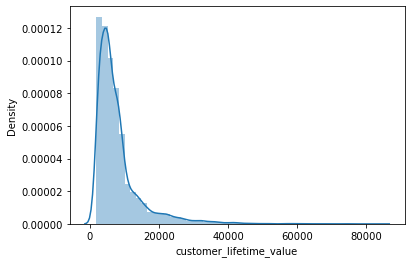

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


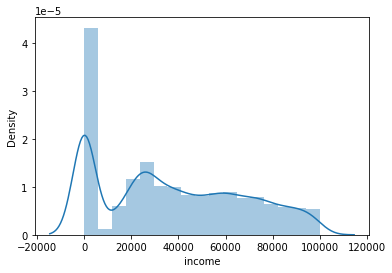

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


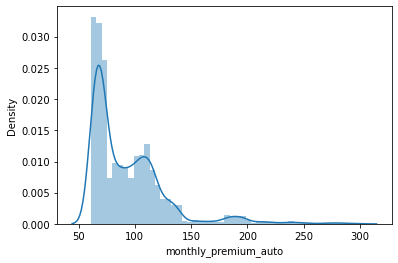

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


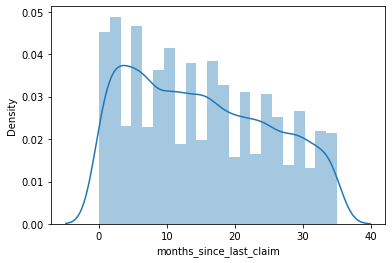

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


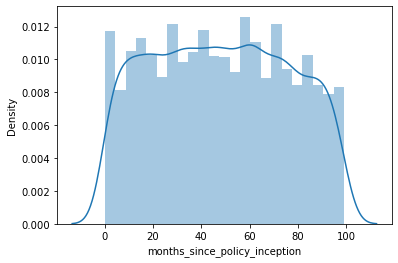

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


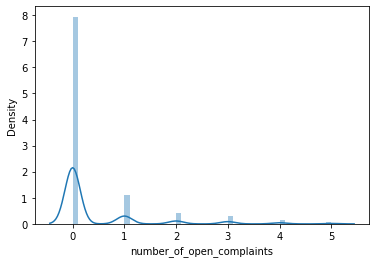

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


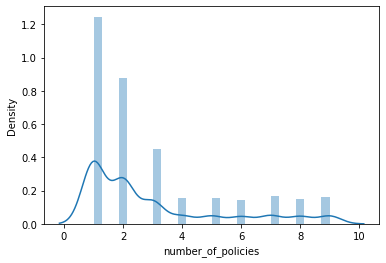

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


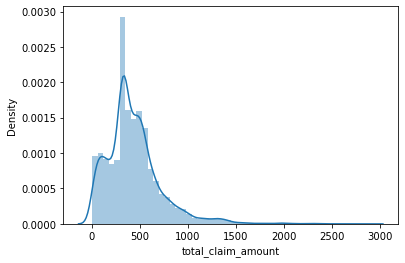

In [11]:
def plot_num(df):
    for col in df.columns:
        sns.distplot(a=df[col])
        plt.show()
    return None

plot_num(numerical)

## Checking for outliers

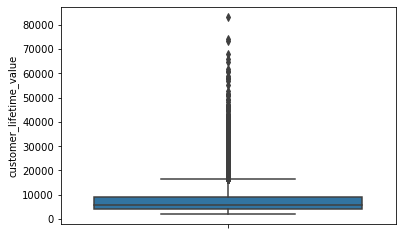

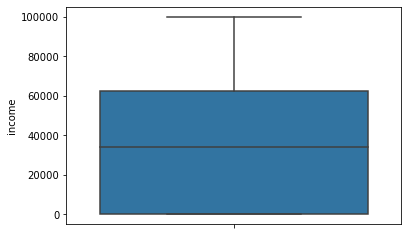

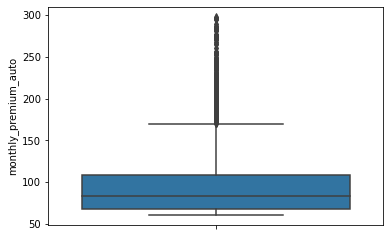

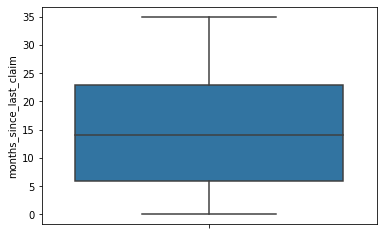

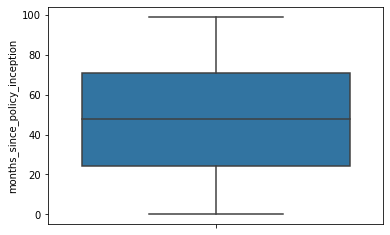

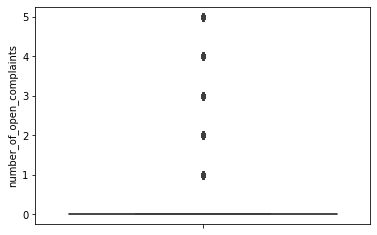

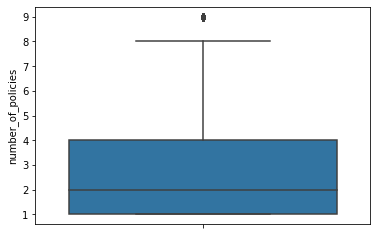

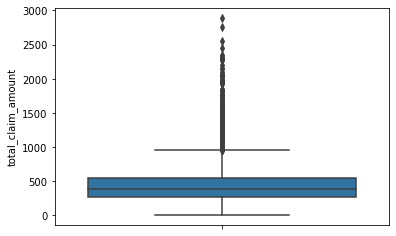

In [12]:
def outlier(df):
    for col in df.columns:
        sns.boxplot(y=df[col])
        plt.show()
    return None

outlier(numerical)

In [13]:
# Customer_lifetime_value, monthly_premium_auto and total_claim_amount do not have so much outliers.

In [14]:
numerical.describe().T

count          mean           std  \
customer_lifetime_value        9134.0   8004.940475   6870.967608   
income                         9134.0  37657.380009  30379.904734   
monthly_premium_auto           9134.0     93.219291     34.407967   
months_since_last_claim        9134.0     15.097000     10.073257   
months_since_policy_inception  9134.0     48.064594     27.905991   
number_of_open_complaints      9134.0      0.384388      0.910384   
number_of_policies             9134.0      2.966170      2.390182   
total_claim_amount             9134.0    434.088794    290.500092   

                                       min          25%           50%  \
customer_lifetime_value        1898.007675  3994.251794   5780.182197   
income                            0.000000     0.000000  33889.500000   
monthly_premium_auto             61.000000    68.000000     83.000000   
months_since_last_claim           0.000000     6.000000     14.000000   
months_since_policy_inception     0.000000    24.000000     48.000000   
number_of_open_complaints         0.000000     0.000000      0.000000   
number_of_policies                1.000000     1.000000      2.000000   
total_claim_amount                0.099007   272.258244    383.945434   

                                        75%           max  
customer_lifetime_value         8962.167041  83325.381190  
income                         62320.000000  99981.000000  
monthly_premium_auto             109.000000    298.000000  
months_since_last_claim           23.000000     35.000000  
months_since_policy_inception     71.000000     99.000000  
number_of_open_complaints          0.000000      5.000000  
number_of_policies                 4.000000      9.000000  
total_claim_amount               547.514839   2893.239678

In [15]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [16]:
def value_count(df):
    for column in df.columns:
#     print(column, ":", variable_customer_df[column].unique()) # unique values for each column
        print(column, ":", len(df[column].unique())) # number of unique value for each column
    
value_count(numerical)

customer_lifetime_value : 8041
income : 5694
monthly_premium_auto : 202
months_since_last_claim : 36
months_since_policy_inception : 100
number_of_open_complaints : 6
number_of_policies : 9
total_claim_amount : 5106


In [17]:
print("Old shape: ", numerical.shape)

Old shape:  (9134, 8)


In [18]:
def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean())/column.var()**(1/2))) > threshold]
    
    return data

In [19]:
CLV_outliers = outliers(numerical["customer_lifetime_value"])
MPA_outliers = outliers(numerical["monthly_premium_auto"])

In [20]:
len(CLV_outliers)

211

In [21]:
len(MPA_outliers)

200

In [22]:
# to_drop = CLV_outliers.index | MPA_outliers.index # Union

In [23]:
# clean_numerical = numerical.drop(to_drop).reset_index(drop = True)
# clean_numerical.isna().sum()

In [24]:
# categorical = categorical.drop(to_drop).reset_index(drop = True)

In [25]:
# print("New shape: ",clean_numerical.shape)

## Looking at categorical features

In [26]:
categorical.head()

customer       state response  coverage education employmentstatus gender  \
0  BU79786  Washington       No     Basic  Bachelor         Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor       Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor         Employed      F   
3  WW63253  California       No     Basic  Bachelor       Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

In [27]:
value_count(categorical) # Customer has 9134 unique values in categorical. Therefore, I dropped it.
categorical = categorical.drop(['customer'],axis=1)

customer : 9134
state : 5
response : 2
coverage : 3
education : 5
employmentstatus : 5
gender : 2
location_code : 3
marital_status : 3
policy_type : 3
policy : 9
renew_offer_type : 4
sales_channel : 4
vehicle_class : 6
vehicle_size : 3


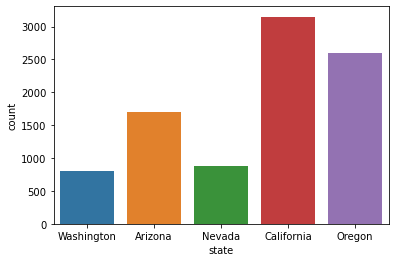

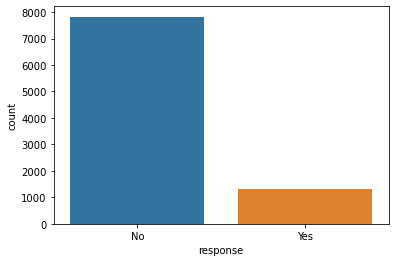

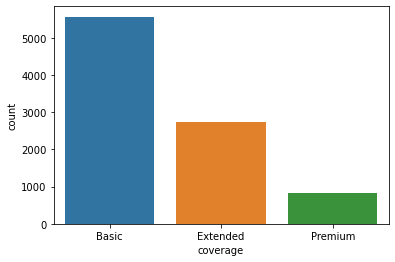

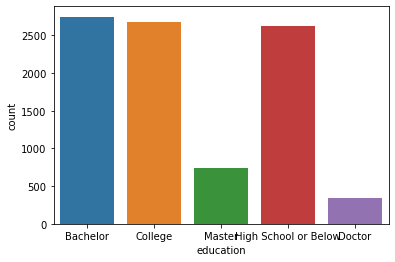

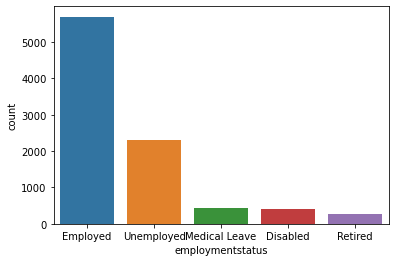

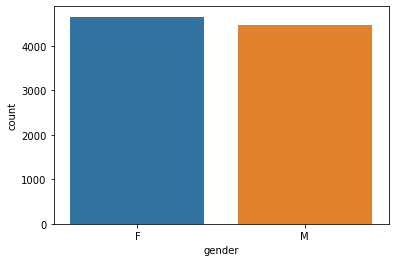

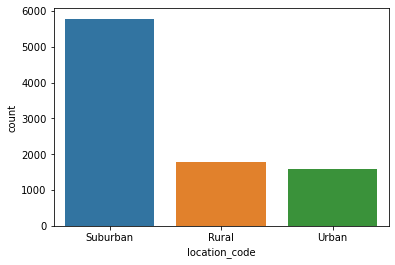

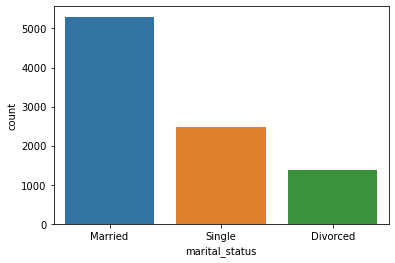

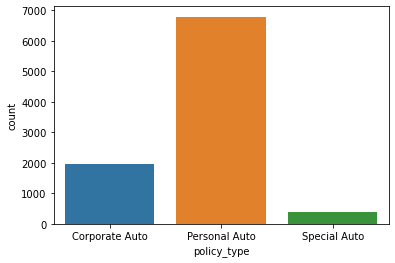

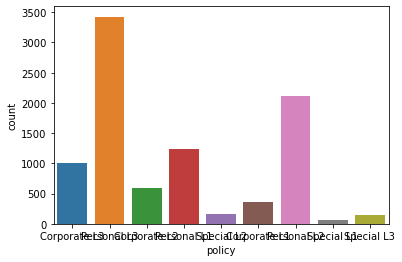

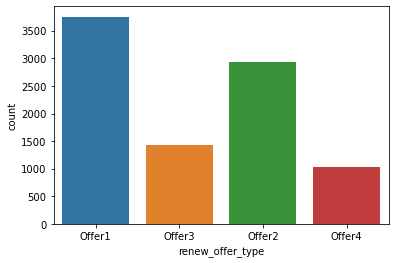

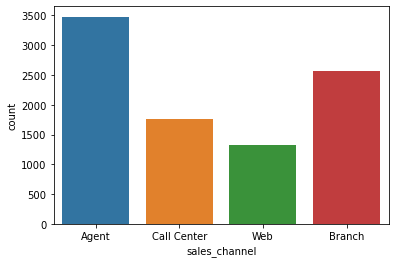

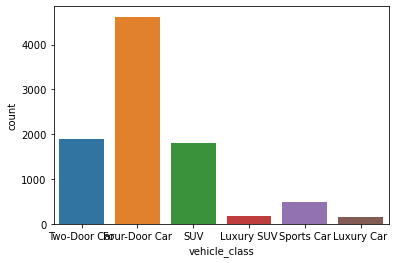

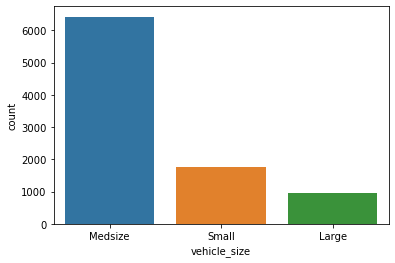

In [28]:
def plot_cat(df):
    for col in df.columns:
        sns.countplot(x=df[col])
        plt.show()
    return None

plot_cat(categorical)

## Differentiate between continuous and discrete variables.

In [29]:
def cont_disc(df): # df = dataframe to pass function to
        
    continuous_lst = [] # set up empty lists
    discrete_lst = []
    
    # column becomes the next column name
    for column in df.columns:               
        if len(df[column].unique()) < (df.shape[0] * 0.01): # if the number of rows is less than cutoff it is discrete; more than cutoff, it is continuous
            continuous_lst.append(column) #append column name to continuous
        else:
            discrete_lst.append(column)
    
    return continuous_lst, discrete_lst

In [30]:
continuous_lst, discrete_lst = cont_disc(numerical)

print('continuous=', continuous_lst)
print('discrete=', discrete_lst)

continuous= ['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']
discrete= ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']


In [31]:
print("Continuous_list: ", continuous_lst)
print("Discrete_list: ", discrete_lst)

Continuous_list:  ['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']
Discrete_list:  ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']


In [32]:
continuous_df = numerical[['customer_lifetime_value','monthly_premium_auto','total_claim_amount']]

In [33]:
discrete_df = numerical[['income','months_since_last_claim', 'months_since_policy_inception','number_of_open_complaints','number_of_policies']]

In [34]:
# return continuous and discrete dataframes inside function

# def cont_disc2(df): # df = dataframe to pass function to
        
#     continuous_lst = [] # set up empty lists
#     discrete_lst = []
    
#     # column becomes the next column name
#     for column in df.columns:               # < (df.shape[0] * 0.02) another option to differentiate: if the number of rows is less than cutoff it is discrete; more than cutoff, it is continuous
#         if len(df[column].unique()) >= 202: # I chose 202 as a cutoff to differentiate the continuous and discrete variables.
#             continuous_lst.append(column) #append column name to continuous
#         else:
#             discrete_lst.append(column)
    
#     continuous_df = df[continuous_lst]
#     discrete_df = df[discrete_lst]

#     return continuous_df, discrete_df

In [35]:
# continuous_df, discrete_df = disc_cont2(variable_customer_df_num)

In [36]:
# continuous_df

In [37]:
# discrete_df

## Plot a correlation matrix, comment what you see.

In [38]:
correlations = numerical.corr()
correlations.head()

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335

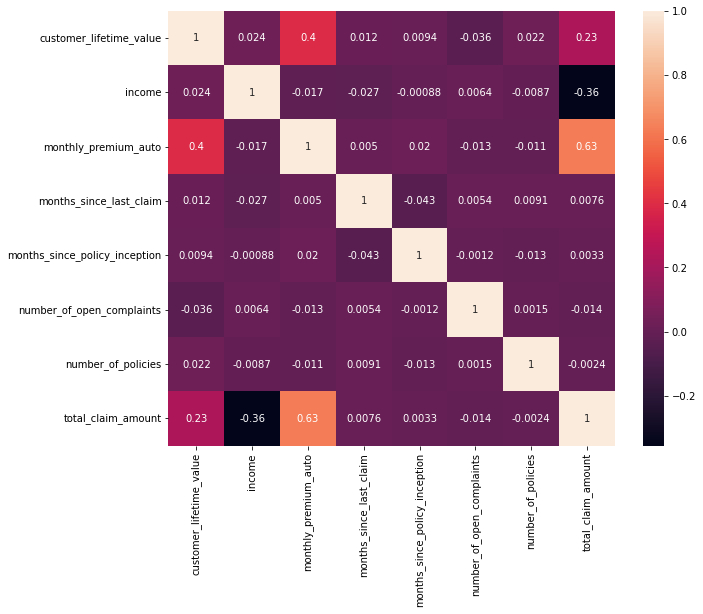

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations, annot=True)
plt.show()

In [40]:
# There is no feature making high collinearity (such as 0.9%). No column was dropped.

## Create a function to plot continuous and discrete variables.

In [41]:
def plot(x):

    for column in x.columns:
        sns.displot(x[column], kde=True)
        plt.show()
    
    return plt

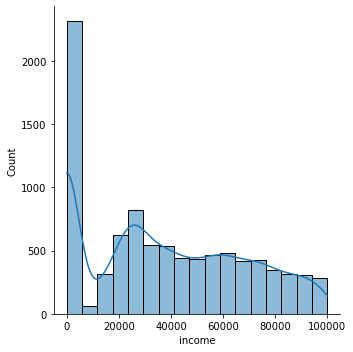

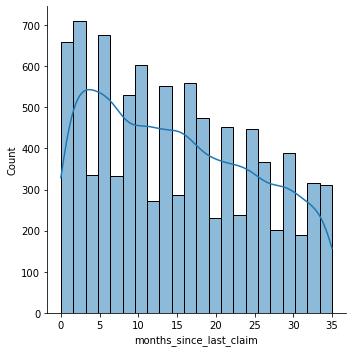

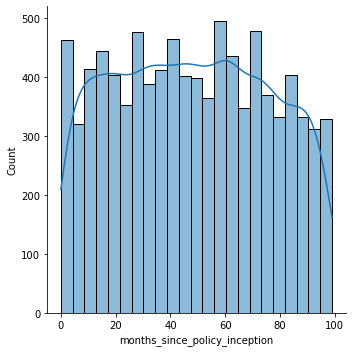

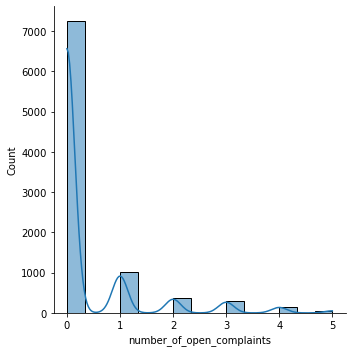

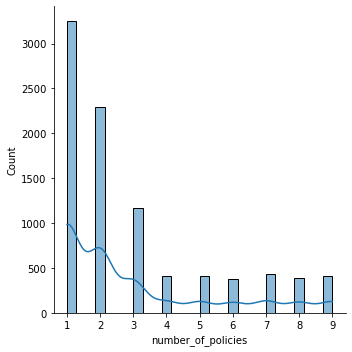

<module 'matplotlib.pyplot' from '/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>


In [42]:
print(plot(discrete_df))

In [43]:
def plot_cont(x):

    for column in x.columns:
        x[column].hist()
        plt.show()
    
    return plt

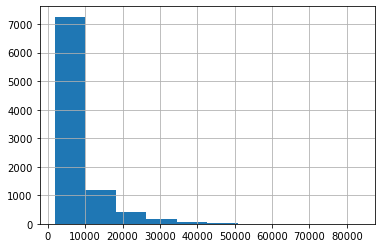

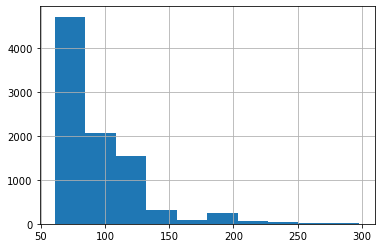

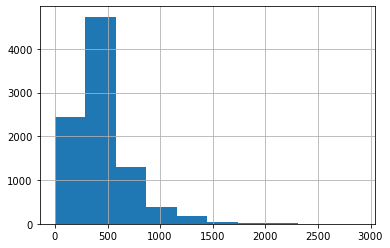

<module 'matplotlib.pyplot' from '/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>


In [44]:
print(plot_cont(continuous_df))

In [45]:
# Lab | Cleaning categorical data.# Discrete variables: distribution plots show that month_since_last_claim and month_since_policy_inception
# has relatively equally distributed values. Number_of_open_complaints and number_of_policies have outliers.

# There are outliers in all continuous variables.

# Lab | Cleaning categorical data.

## Necessary libraries. Same data

In [46]:
# Same file is imported in the beginning of the notebook.

## Working with categoricals

In [47]:
categorical_columns = [col for col in categorical if (len(categorical[col].unique()) < (numerical.shape[0] *0.01))]

In [48]:
print(categorical_columns)

['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


In [49]:
categorical.head()

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

## Check for NaN values.

In [50]:
# no null values
categorical.isnull().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

## Check all unique values of columns.

In [51]:
for column in categorical.columns:
    print(column, ":", categorical[column].unique()) # unique values for each column
    print(column, ":", len(categorical[column].unique())) # number of unique value for each column

state : ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
state : 5
response : ['No' 'Yes']
response : 2
coverage : ['Basic' 'Extended' 'Premium']
coverage : 3
education : ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
education : 5
employmentstatus : ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
employmentstatus : 5
gender : ['F' 'M']
gender : 2
location_code : ['Suburban' 'Rural' 'Urban']
location_code : 3
marital_status : ['Married' 'Single' 'Divorced']
marital_status : 3
policy_type : ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy_type : 3
policy : ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
policy : 9
renew_offer_type : ['Offer1' 'Offer3' 'Offer2' 'Offer4']
renew_offer_type : 4
sales_channel : ['Agent' 'Call Center' 'Web' 'Branch']
sales_channel : 4
vehicle_class : ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehic

## Check dtypes. Do they all make sense as categorical data?

In [52]:
categorical.dtypes

# All columns have categorical values. This implies that the dataframe was fully categorized into numerical and
# categorical parts.

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [53]:
categorical.head(20)

state response  coverage             education employmentstatus  \
0   Washington       No     Basic              Bachelor         Employed   
1      Arizona       No  Extended              Bachelor       Unemployed   
2       Nevada       No   Premium              Bachelor         Employed   
3   California       No     Basic              Bachelor       Unemployed   
4   Washington       No     Basic              Bachelor         Employed   
5       Oregon      Yes     Basic              Bachelor         Employed   
6       Oregon      Yes     Basic               College         Employed   
7      Arizona       No   Premium                Master       Unemployed   
8       Oregon      Yes     Basic              Bachelor    Medical Leave   
9       Oregon       No  Extended               College         Employed   
10  California       No     Basic               College       Unemployed   
11  California       No     Basic               College       Unemployed   
12  California       No   Premium                Master         Employed   
13     Arizona      Yes     Basic  High School or Below         Employed   
14  California       No     Basic               College         Employed   
15      Oregon       No     Basic              Bachelor         Employed   
16      Nevada       No     Basic  High School or Below    Medical Leave   
17  California       No     Basic               College    Medical Leave   
18      Oregon       No     Basic               College         Employed   
19  California       No   Premium  High School or Below         Employed   

   gender location_code marital_status     policy_type        policy  \
0       F      Suburban        Married  Corporate Auto  Corporate L3   
1       F      Suburban         Single   Personal Auto   Personal L3   
2       F      Suburban        Married   Personal Auto   Personal L3   
3       M      Suburban        Married  Corporate Auto  Corporate L2   
4       M         Rural         Single   Personal Auto   Personal L1   
5       F         Rural        Married   Personal Auto   Personal L3   
6       F      Suburban        Married  Corporate Auto  Corporate L3   
7       M         Urban         Single  Corporate Auto  Corporate L3   
8       M      Suburban       Divorced  Corporate Auto  Corporate L3   
9       F         Urban        Married    Special Auto    Special L2   
10      M      Suburban         Single   Personal Auto   Personal L3   
11      F      Suburban        Married   Personal Auto   Personal L3   
12      M         Urban        Married  Corporate Auto  Corporate L1   
13      M      Suburban        Married  Corporate Auto  Corporate L3   
14      M         Urban         Single  Corporate Auto  Corporate L3   
15      F         Rural        Married  Corporate Auto  Corporate L2   
16      M      Suburban        Married   Personal Auto   Personal L3   
17      M      Suburban        Married   Personal Auto   Personal L2   
18      M         Urban        Married   Personal Auto   Personal L2   
19      F      Suburban        Married  Corporate Auto  Corporate L2   

   renew_offer_type sales_channel  vehicle_class vehicle_size  
0            Offer1         Agent   Two-Door Car      Medsize  
1            Offer3         Agent  Four-Door Car      Medsize  
2            Offer1         Agent   Two-Door Car      Medsize  
3            Offer1   Call Center            SUV      Medsize  
4            Offer1         Agent  Four-Door Car      Medsize  
5            Offer2           Web   Two-Door Car      Medsize  
6            Offer1         Agent  Four-Door Car      Medsize  
7            Offer1         Agent  Four-Door Car      Medsize  
8            Offer1         Agent  Four-Door Car      Medsize  
9            Offer2        Branch  Four-Door Car      Medsize  
10           Offer1         Agent  Four-Door Car        Small  
11           Offer2         Agent            SUV      Medsize  
12           Offer2         Agent  Four-Door Car      Medsize  
13 

## Does any column contain alpha and numeric data? Decide how to clean it.



In [54]:
# Policy and renew_offer_type columns have alpha and numerica data. The policy column was
# previously wrangled.

# renew_offer_type column could be simplified as well.

# Substitute NaNs with mode: this is not a great solution. In this way, we overemphasize the mode value of the column.
# We can improve a model (KNN classifier) to predict an intermediate target. 

In [55]:
# # check for numeric values: there is no column that has only numeric values.
# for column in categorical.columns:
#     print(categorical[column].str.isnumeric().value_counts()) 

In [56]:
# # check for alpha values: there are some columns (i.e. state, education) that have alpha values.
# for column in categorical.columns: 
#     print(categorical[column].str.isalpha().value_counts()) 

In [57]:
# # check for alphanumeric characters: there are some columns that have alphanumeric characters.
# for column in categorical.columns:
#     print(categorical[column].str.isalnum().value_counts()) 

## Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [58]:
# We can apply qcut or cut techniques to divide the categorical data into bins.
# For categorical variables we can plot the relation between bins and check outliers.

## Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [59]:
# Personal Auto     6788
# Corporate Auto    1968
# Special Auto       378
# Name: policy_type, dtype: int64
# Personal L3     3426
# Personal L2     2122
# Personal L1     1240
# Corporate L3    1014
# Corporate L2     595
# Corporate L1     359
# Special L2       164
# Special L3       148
# Special L1        66
# Name: policy, dtype: int64

In [60]:
# Policy_type column is divided into three; personal auto, corporate auto, and special auto.
# The personal auto, corporate auto, and special auto are subdivided into three in policy column.
# Therefore, detailed information is given in policy column.
# In this case, policy column could be removed since all the information in policy column are also given in policy_type column as a simplified classification.

## Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [61]:
# The unique values in policy column can be combined. 
# The policy_type column already has the combined version of the unique values in policy column.

# Luxury SUV and Luxury Car can be combined to form Luxury vales in vehicle_class.

# Disable, retired, and medical leave can be combined and attached into Unemployed value in employment status.

# Bachelor and college can be combined to form undergraduate value and Master and Doctor can be combined to form graduate value.

In [62]:
for column in categorical.columns:
    print(categorical[column].value_counts()) 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


In [63]:
for column in categorical.columns:
    print(categorical[column].value_counts()) 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


# Lab | Feature extraction

## Open the categoricals variable we created before.

In [64]:
categorical.head()

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

## Plot all the categorical variables with the proper plot.

In [65]:
# When I look to other plots of the categorical variables, the data is imbalanced except for gender column.

# Distribution of the values in the columns varies. Oversampling, undersampling or smote can be applied.

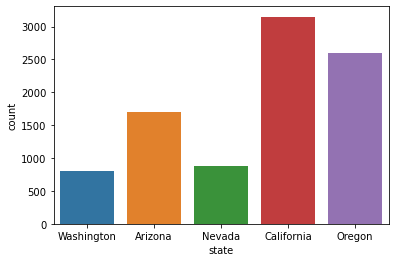

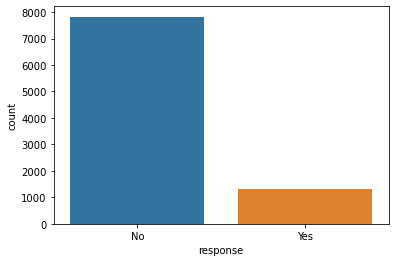

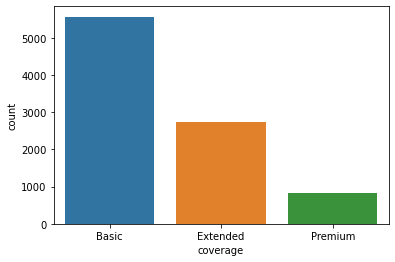

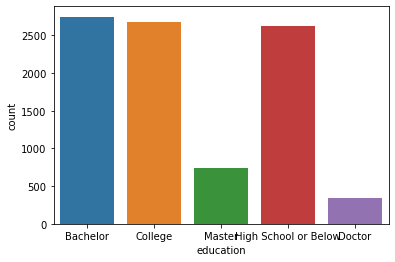

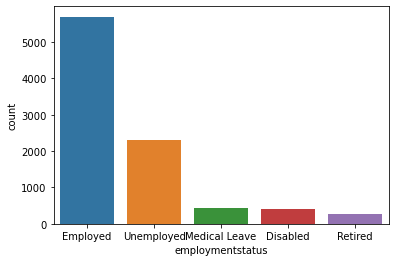

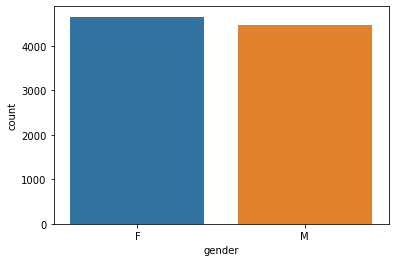

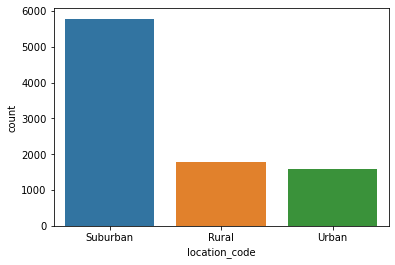

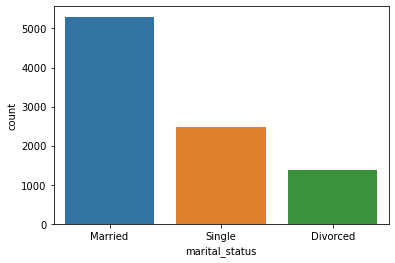

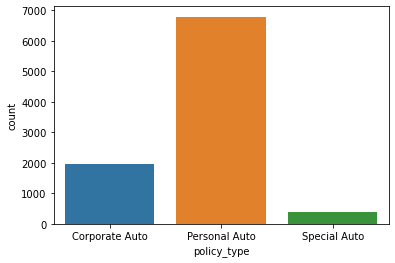

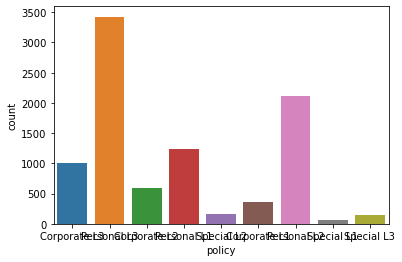

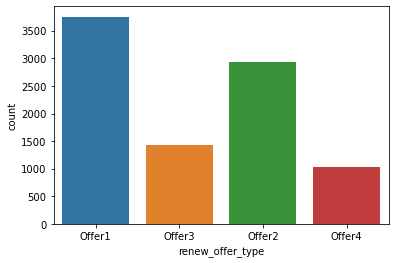

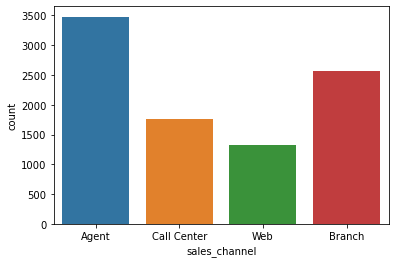

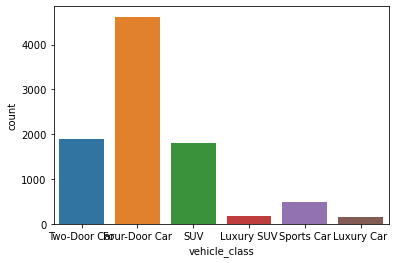

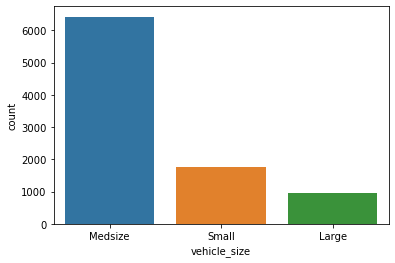

In [66]:
plot_cat(categorical)

## There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [67]:
# The unique values in policy column can be combined. 

# The customer column has 9134 unique values. It comprises alphanumeric characters. We need to combine the unique values in customer column to decrease the number of unique values. 

# The policy_type column already has the combined version of the unique values in policy column.

# Luxury SUV and Luxury Car can be combined to form Luxury vales in vehicle_class.

# Disable, retired, and medical leave can be combined and attached into Unemployed value in employment status.

# Bachelor and college can be combined to form undergraduate value and Master and Doctor can be combined to form graduate value.

In [68]:
for column in categorical.columns:
    print(column, ":", categorical[column].unique()) # unique values for each column
    print(column, ":", len(categorical[column].unique())) # number of unique value for each column

state : ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
state : 5
response : ['No' 'Yes']
response : 2
coverage : ['Basic' 'Extended' 'Premium']
coverage : 3
education : ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
education : 5
employmentstatus : ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
employmentstatus : 5
gender : ['F' 'M']
gender : 2
location_code : ['Suburban' 'Rural' 'Urban']
location_code : 3
marital_status : ['Married' 'Single' 'Divorced']
marital_status : 3
policy_type : ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy_type : 3
policy : ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
policy : 9
renew_offer_type : ['Offer1' 'Offer3' 'Offer2' 'Offer4']
renew_offer_type : 4
sales_channel : ['Agent' 'Call Center' 'Web' 'Branch']
sales_channel : 4
vehicle_class : ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehic

In [69]:
for column in categorical.columns:
    print(categorical[column].value_counts()) 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


In [70]:
# Substitute NaNs with mode: this is not a great solution. In this way, we overemphasize the mode value of the column.
# We can improve a model (KNN classifier) to predict an intermediate target. 

In [71]:
# # check for numeric values: there is no column that has only numeric values.
# for column in categorical.columns:
#     print(categorical[column].str.isnumeric().value_counts()) 

In [72]:
# # check for alpha values: there are some columns (i.e. state, education) that have alpha values.
# for column in categorical.columns: 
#     print(categorical[column].str.isalpha().value_counts()) 

In [73]:
# # check for alphanumeric characters: there are some columns that have alphanumeric characters.
# for column in categorical.columns:
#     print(categorical[column].str.isalnum().value_counts()) 

In [74]:
# We can apply qcut or cut techniques to divide the categorical data into bins.
# For categorical variables we can plot the relation between bins and check outliers.

## Plot time variable. Can you extract something from it?

In [75]:
# There are drops in each three or four month.

# At the end or middle of certain months, the policy could expire near the payment of checks.

# This might lead to drop in wages of employees. 

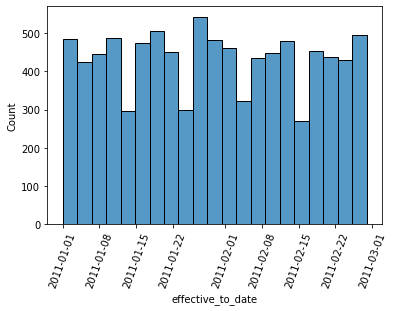

In [76]:
chart = sns.histplot(variable_customer_df['effective_to_date'])
plt.xticks(rotation=70)
plt.show()

# Lab | Comparing regression models

## Dummy code for ordinal encoding

In [77]:
categorical["coverage"] = categorical["coverage"].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})

In [78]:
categorical["employmentstatus"].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [79]:
categorical["education"] = categorical["education"].map({"High School or Below" : 0, "Bachelor" : 0.5, "College" : 0.5,"Master" : 1, "Doctor" : 1})

In [80]:
categorical["employmentstatus"] = categorical["employmentstatus"].map({"Medical Leave" : 0,"Disabled" : 0, "Unemployed" : 0, "Retired" : 0.5, "Employed" : 1})

In [81]:
categorical["location_code"] = categorical["location_code"].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})

In [82]:
categorical["vehicle_size"] = categorical["vehicle_size"].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})

In [83]:
categorical.head()

state response  coverage  education  employmentstatus gender  \
0  Washington       No       0.0        0.5               1.0      F   
1     Arizona       No       0.5        0.5               0.0      F   
2      Nevada       No       1.0        0.5               1.0      F   
3  California       No       0.0        0.5               0.0      M   
4  Washington       No       0.0        0.5               1.0      M   

   location_code marital_status     policy_type        policy  \
0            0.5        Married  Corporate Auto  Corporate L3   
1            0.5         Single   Personal Auto   Personal L3   
2            0.5        Married   Personal Auto   Personal L3   
3            0.5        Married  Corporate Auto  Corporate L2   
4            0.0         Single   Personal Auto   Personal L1   

  renew_offer_type sales_channel  vehicle_class  vehicle_size  
0           Offer1         Agent   Two-Door Car           0.5  
1           Offer3         Agent  Four-Door Car           0.5  
2           Offer1         Agent   Two-Door Car           0.5  
3           Offer1   Call Center            SUV           0.5  
4           Offer1         Agent  Four-Door Car           0.5

In [84]:
categorical.policy = categorical.policy.str.replace("\w* ",' ')
# redundant info in policy column is removed.

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_8711/903099033.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  categorical.policy = categorical.policy.str.replace("\w* ",' ')


In [85]:
categorical

state response  coverage  education  employmentstatus gender  \
0     Washington       No       0.0        0.5               1.0      F   
1        Arizona       No       0.5        0.5               0.0      F   
2         Nevada       No       1.0        0.5               1.0      F   
3     California       No       0.0        0.5               0.0      M   
4     Washington       No       0.0        0.5               1.0      M   
5         Oregon      Yes       0.0        0.5               1.0      F   
6         Oregon      Yes       0.0        0.5               1.0      F   
7        Arizona       No       1.0        1.0               0.0      M   
8         Oregon      Yes       0.0        0.5               0.0      M   
9         Oregon       No       0.5        0.5               1.0      F   
10    California       No       0.0        0.5               0.0      M   
11    California       No       0.0        0.5               0.0      F   
12    California       No       1.0        1.0               1.0      M   
13       Arizona      Yes       0.0        0.0               1.0      M   
14    California       No       0.0        0.5               1.0      M   
15        Oregon       No       0.0        0.5               1.0      F   
16        Nevada       No       0.0        0.0               0.0      M   
17    California       No       0.0        0.5               0.0      M   
18        Oregon       No       0.0        0.5               1.0      M   
19    California       No       1.0        0.0               1.0      F   
20        Oregon       No       0.0        0.0               1.0      M   
21    Washington       No       0.5        0.5               0.0      F   
22       Arizona      Yes       0.0        0.5               0.0      M   
23        Nevada       No       0.0        0.5               0.0      F   
24    California       No       0.0        0.5               0.0      F   
25        Oregon       No       0.0        0.5               1.0      M   
26    California       No       1.0        0.5               0.0      F   
27    Washington       No       0.5        1.0               0.0      F   
28       Arizona       No       1.0        0.5               1.0      F   
29        Oregon       No       0.5        1.0               1.0      F   
30       Arizona       No       0.0        0.5               1.0      M   
31        Nevada       No       0.5        0.0               1.0      M   
32    California       No       0.0        0.5               0.0      M   
33    Washington       No       0.0        0.5               1.0      M   
34        Oregon       No       0.0        0.5               1.0      F   
35       Arizona       No       0.0        0.0               1.0      F   
36    California       No       1.0        0.5               1.0      M   
37        Oregon       No       0.5        1.0               1.0      F   
38        Oregon       No       0.5        0.5               0.0      M   
39       Arizona       No       0.0        0.0               1.0      M   
40        Nevada       No       0.0        0.0               0.0      F   
41        Oregon      Yes       0.0        0.5               1.0      F   
42    California      Yes       0.5        0.5               1.0      F   
43       Arizona       No       0.0        0.0               1.0      M   
44    Washington       No       0.0        0.5               1.0      M   
45        Oregon       No       1.0        1.0               0.0      F   
46       Arizona       No       0.0        0.5               0.0      M   
47        Oregon       No       0.0        0.0               1.0      F   
48    California       No       0.5        0.5               0.0      F   
49       Arizona       No       0.0        0.0               0.0      F   
50        Oregon       No       0.0        0.5               1.0      M   
51    California      Yes       0.0        0.5               1.0      F   
52        Nevada       No       0.0 

In [86]:
X_all = pd.concat([numerical,categorical], axis = 1)
X_all.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  \
0                          0                   1          384.811147   
1                          0                   8         1131.464935   
2                          0                   2          566.472247   
3                          0                   7          529.881344   
4                          0                   1          138.130879   

        state response  coverage  education  employmentstatus gender  \
0  Washington       No       0.0        0.5               1.0      F   
1     Arizona       No       0.5        0.5               0.0      F   
2      Nevada       No       1.0        0.5               1.0      F   
3  California       No       0.0        0.5               0.0      M   
4  Washington       No       0.0        0.5               1.0      M   

   location_code marital_status     policy_type policy renew_offer_type  \
0            0.5        Married  Corporate Auto     L3           Offer1   
1            0.5         Single   Personal Auto     L3           Offer3   
2            0.5        Married   Personal Auto     L3           Offer1   
3            0.5        Married  Corporate Auto     L2           Offer1   
4            0.0         Single   Personal Auto     L1           Offer1   

  sales_channel  vehicle_class  vehicle_size  
0         Agent   Two-Door Car           0.5  
1         Agent  Four-Door Car           0.5  
2         Agent   Two-Door Car           0.5  
3   Call Center            SUV           0.5  
4         Agent  Four-Door Car           0.5

## X-y Split

In [87]:
X = X_all.drop('total_claim_amount', axis=1)
y = X_all['total_claim_amount']

In [88]:
X.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## Train/test/split data

## Splitting / Scaling / Onehotencoding X_train and X_test

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (7307, 21)
X_test shape:  (1827, 21)
y_train shape:  (7307,)
y_test shape:  (1827,)


## Break into Numerical and Categorical

In [90]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [91]:
X_train_num.head()

customer_lifetime_value  income  monthly_premium_auto  \
1212              5328.835851   81064                    70   
5656              2602.650842   41958                    66   
7437              4864.527356   37406                   122   
3274              8002.308333       0                   107   
5153             13345.135450   80277                   112   

      months_since_last_claim  months_since_policy_inception  \
1212                       20                              4   
5656                       15                             49   
7437                       23                             38   
3274                        3                             65   
5153                        6                             40   

      number_of_open_complaints  number_of_policies  coverage  education  \
1212                          4                   3       0.0        0.5   
5656                          1                   1       0.0        1.0   
7437                          1                   1       0.5        0.5   
3274                          0                   3       0.0        0.5   
5153                          1                   2       0.0        0.5   

      employmentstatus  location_code  vehicle_size  
1212               1.0            0.0           1.0  
5656               1.0            1.0           0.0  
7437               1.0            0.5           0.0  
3274               0.0            0.5           0.5  
5153               1.0            0.0           0.5

## MinMax Scaler

In [92]:
transformer = MinMaxScaler().fit(X_train_num)

In [93]:
X_norm1 = transformer.transform(X_train_num)
X_train_scale = pd.DataFrame(X_norm1,columns=X_train_num.columns)
X_train_scale.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                 0.042134  0.810794              0.038136   
1                 0.008654  0.419660              0.021186   
2                 0.036431  0.374131              0.258475   
3                 0.074966  0.000000              0.194915   
4                 0.140581  0.802923              0.216102   

   months_since_last_claim  months_since_policy_inception  \
0                 0.571429                       0.040404   
1                 0.428571                       0.494949   
2                 0.657143                       0.383838   
3                 0.085714                       0.656566   
4                 0.171429                       0.404040   

   number_of_open_complaints  number_of_policies  coverage  education  \
0                        0.8               0.250       0.0        0.5   
1                        0.2               0.000       0.0        1.0   
2                        0.2               0.000       0.5        0.5   
3                        0.0               0.250       0.0        0.5   
4                        0.2               0.125       0.0        0.5   

   employmentstatus  location_code  vehicle_size  
0               1.0            0.0           1.0  
1               1.0            1.0           0.0  
2               1.0            0.5           0.0  
3               0.0            0.5           0.5  
4               1.0            0.0           0.5

In [94]:
X_norm2 = transformer.transform(X_test_num)
X_test_scale = pd.DataFrame(X_norm2,columns=X_test_num.columns)
X_test_scale.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                 0.006821  0.837879              0.004237   
1                 0.083444  0.977866              0.046610   
2                 0.043305  0.674268              0.029661   
3                 0.023898  0.439954              0.148305   
4                 0.033779  0.000000              0.254237   

   months_since_last_claim  months_since_policy_inception  \
0                 0.371429                       0.767677   
1                 0.628571                       0.141414   
2                 0.200000                       0.373737   
3                 0.828571                       0.171717   
4                 0.314286                       0.101010   

   number_of_open_complaints  number_of_policies  coverage  education  \
0                        0.0               0.000       0.0        0.5   
1                        0.0               0.125       0.0        0.0   
2                        0.0               0.875       0.0        0.5   
3                        0.0               0.000       0.5        0.5   
4                        0.0               0.000       0.5        0.5   

   employmentstatus  location_code  vehicle_size  
0               1.0            0.0           1.0  
1               1.0            0.0           0.5  
2               1.0            0.0           0.5  
3               1.0            0.5           0.5  
4               0.0            0.5           0.5

## Onehotencoding

In [95]:
X_train_cat.head(1)

state response gender marital_status    policy_type policy  \
1212  California       No      F         Single  Personal Auto     L3   

     renew_offer_type sales_channel vehicle_class  
1212           Offer1         Agent  Two-Door Car

In [96]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.head()

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


state_California  state_Nevada  state_Oregon  state_Washington  \
0               1.0           0.0           0.0               0.0   
1               1.0           0.0           0.0               0.0   
2               0.0           0.0           1.0               0.0   
3               1.0           0.0           0.0               0.0   
4               1.0           0.0           0.0               0.0   

   response_Yes  gender_M  marital_status_Married  marital_status_Single  \
0           0.0       0.0                     0.0                    1.0   
1           0.0       1.0                     1.0                    0.0   
2           0.0       1.0                     1.0                    0.0   
3           1.0       0.0                     1.0                    0.0   
4           0.0       1.0                     1.0                    0.0   

   policy_type_Personal Auto  policy_type_Special Auto  policy_ L2  \
0                        1.0                       0.0         0.0   
1                        0.0                       0.0         0.0   
2                        0.0                       0.0         0.0   
3                        1.0                       0.0         0.0   
4                        0.0                       0.0         1.0   

   policy_ L3  renew_offer_type_Offer2  renew_offer_type_Offer3  \
0         1.0                      0.0                      0.0   
1         1.0                      0.0                      0.0   
2         1.0                      0.0                      1.0   
3         0.0                      0.0                      0.0   
4         0.0                      0.0                      0.0   

   renew_offer_type_Offer4  sales_channel_Branch  sales_channel_Call Center  \
0                      0.0                   0.0                        0.0   
1                      1.0                   0.0                        1.0   
2                      0.0                   0.0                        1.0   
3                      0.0                   0.0                        0.0   
4                      0.0                   0.0                        0.0   

   sales_channel_Web  vehicle_class_Luxury Car  vehicle_class_Luxury SUV  \
0                0.0                       0.0                       0.0   
1                0.0                       0.0                       0.0   
2                0.0                       0.0                       0.0   
3                0.0                       0.0                       0.0   
4                0.0                       0.0                       0.0   

   vehicle_class_SUV  vehicle_class_Sports Car  vehicle_class_Two-Door Car  
0                0.0                       0.0                         1.0  
1                0.0                       0.0                         0.0  
2                1.0                       0.0                         0.0  
3                1.0                       0.0                         0.0  
4                1.0                       0.0                         0.0

In [97]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.head()

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


state_California  state_Nevada  state_Oregon  state_Washington  \
0               1.0           0.0           0.0               0.0   
1               0.0           0.0           1.0               0.0   
2               0.0           0.0           1.0               0.0   
3               1.0           0.0           0.0               0.0   
4               0.0           0.0           1.0               0.0   

   response_Yes  gender_M  marital_status_Married  marital_status_Single  \
0           0.0       1.0                     0.0                    0.0   
1           0.0       0.0                     0.0                    0.0   
2           0.0       0.0                     1.0                    0.0   
3           0.0       1.0                     1.0                    0.0   
4           0.0       0.0                     1.0                    0.0   

   policy_type_Personal Auto  policy_type_Special Auto  policy_ L2  \
0                        1.0                       0.0         0.0   
1                        1.0                       0.0         0.0   
2                        1.0                       0.0         0.0   
3                        1.0                       0.0         0.0   
4                        1.0                       0.0         0.0   

   policy_ L3  renew_offer_type_Offer2  renew_offer_type_Offer3  \
0         1.0                      0.0                      1.0   
1         0.0                      0.0                      1.0   
2         0.0                      1.0                      0.0   
3         1.0                      1.0                      0.0   
4         0.0                      0.0                      1.0   

   renew_offer_type_Offer4  sales_channel_Branch  sales_channel_Call Center  \
0                      0.0                   1.0                        0.0   
1                      0.0                   0.0                        0.0   
2                      0.0                   1.0                        0.0   
3                      0.0                   0.0                        1.0   
4                      0.0                   0.0                        1.0   

   sales_channel_Web  vehicle_class_Luxury Car  vehicle_class_Luxury SUV  \
0                0.0                       0.0                       0.0   
1                0.0                       0.0                       0.0   
2                0.0                       0.0                       0.0   
3                0.0                       0.0                       0.0   
4                0.0                       0.0                       0.0   

   vehicle_class_SUV  vehicle_class_Sports Car  vehicle_class_Two-Door Car  
0                0.0                       0.0                         1.0  
1                0.0                       0.0                         1.0  
2                0.0                       0.0                         0.0  
3                0.0                       0.0                         0.0  
4                1.0                       0.0                         0.0

## Concat scaled numericals and encoded categoricals

In [98]:
X_train = pd.concat([X_train_cat_encode, X_train_scale], axis=1)

X_test = pd.concat([X_test_cat_encode, X_test_scale], axis=1)

In [99]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (7307, 35)
X_test shape:  (1827, 35)
y_train shape:  (7307,)
y_test shape:  (1827,)


## Models

In [100]:
# Define function to run all models.

def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train-->{model.score(X_train, y_train)}, Test-->{model.score(X_test, y_test)}")

In [101]:
model_list = [LinearRegression(), SGDRegressor(), KNeighborsRegressor(), MLPRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

In [102]:
models_automation(model_list, X_train, y_train)
# It looks like the Random Forest Regressor had the best results.

LinearRegression: Train-->0.6287262063090288, Test-->0.6247093821329532
SGDRegressor: Train-->0.6240334967218772, Test-->0.6160739037604746
KNeighborsRegressor: Train-->0.6273969864798656, Test-->0.44364991332900416


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train-->0.7162729920988089, Test-->0.7059193014638683
DecisionTreeRegressor: Train-->1.0, Test-->0.6800127462843273
RandomForestRegressor: Train-->0.9776488456637492, Test-->0.8354039779210077


# Lab | Random variable distributions

## Get the numerical variables from our dataset.

In [103]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [104]:
# Numerical variables of data shows an exponential distribution.

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


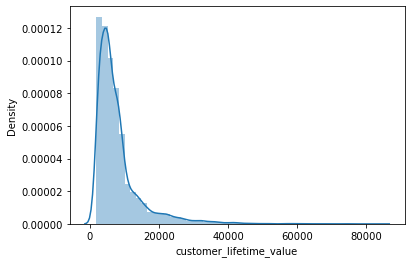

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


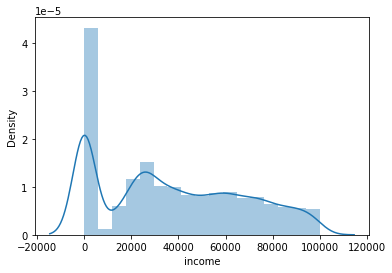

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


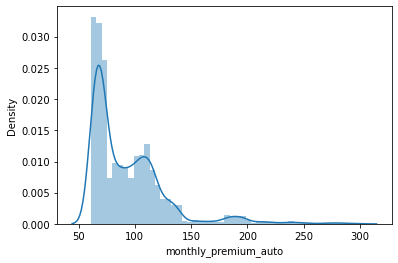

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


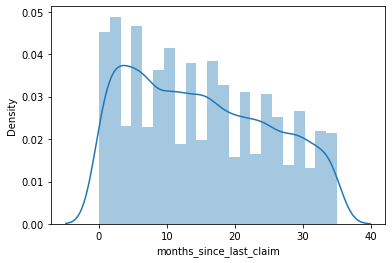

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


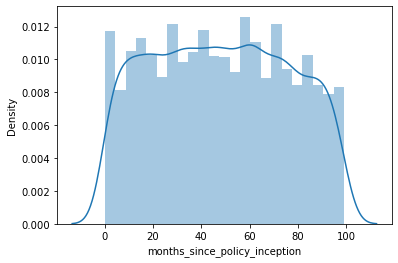

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


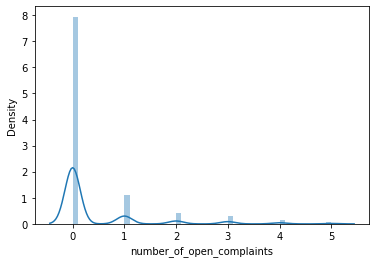

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


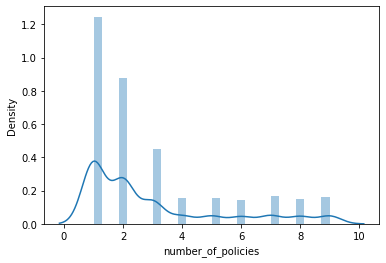

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


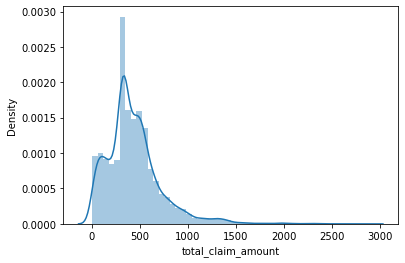

In [105]:
plot_num(numerical)

## Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [106]:
# Log transformation is applied for continuous and discrete variables. Number of open complaints and income
# data has been changed. The data from remaining columns do not change.

In [107]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [108]:
def plothist(col):
    pd.Series(variable_customer_df[col].apply(log_transfom_clean)).hist()
    plt.show()
    
    return None

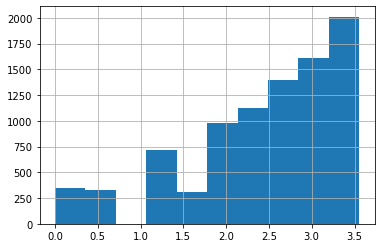

In [109]:
plothist('months_since_last_claim')

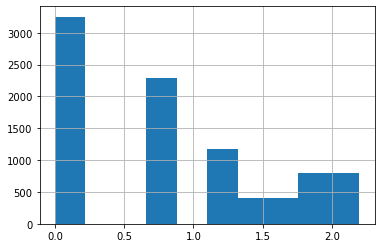

In [110]:
plothist('number_of_policies')

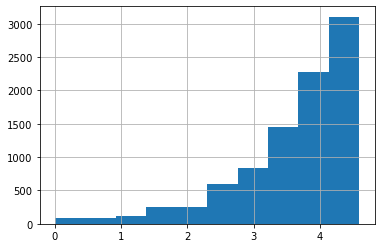

In [111]:
plothist('months_since_policy_inception')

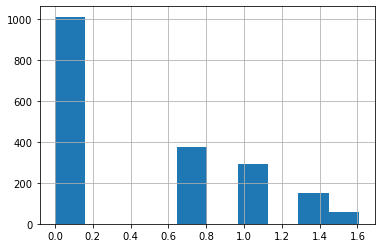

In [112]:
plothist('number_of_open_complaints')

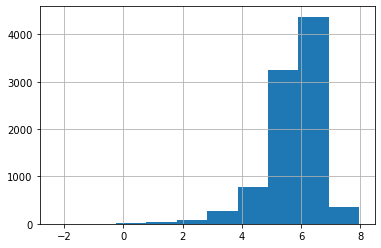

In [113]:
plothist('total_claim_amount')

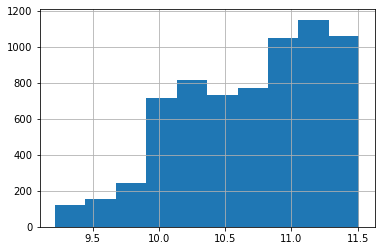

In [114]:
plothist('income')

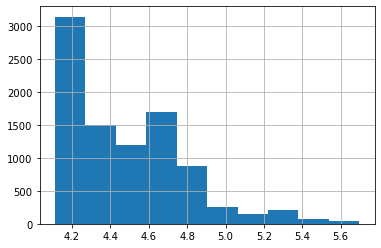

In [115]:
plothist('monthly_premium_auto')

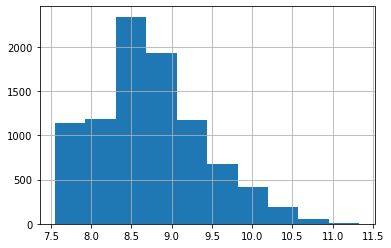

In [116]:
plothist('customer_lifetime_value')

In [117]:
variable_customer_df['total_claim_amount'].mean()

434.0887943128942

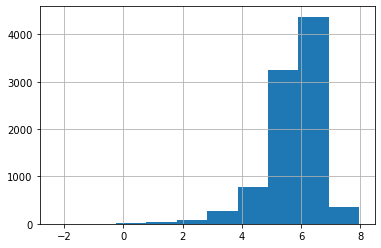

In [118]:
variable_customer_df['total_claim_amount_transformed'] = variable_customer_df['total_claim_amount'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['total_claim_amount_transformed'] = variable_customer_df['total_claim_amount_transformed'].fillna(np.mean(variable_customer_df['total_claim_amount_transformed']))
variable_customer_df['total_claim_amount_transformed'].hist()
plt.show()

In [119]:
variable_customer_df['monthly_premium_auto'].mean()

93.21929056273265

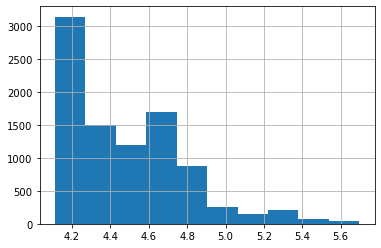

In [120]:
variable_customer_df['monthly_premium_auto_transformed'] = variable_customer_df['monthly_premium_auto'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['monthly_premium_auto_transformed'] = variable_customer_df['monthly_premium_auto_transformed'].fillna(np.mean(variable_customer_df['monthly_premium_auto_transformed']))
variable_customer_df['monthly_premium_auto_transformed'].hist()
plt.show()

In [121]:
variable_customer_df['customer_lifetime_value'].mean()

8004.9404749870755

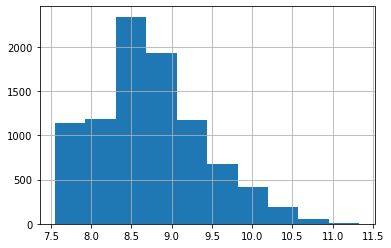

In [122]:
variable_customer_df['customer_lifetime_value_transformed'] = variable_customer_df['customer_lifetime_value'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['customer_lifetime_value_transformed'] = variable_customer_df['customer_lifetime_value_transformed'].fillna(np.mean(variable_customer_df['customer_lifetime_value_transformed']))
variable_customer_df['customer_lifetime_value_transformed'].hist()
plt.show()

In [123]:
variable_customer_df['income'].mean()

37657.38000875848

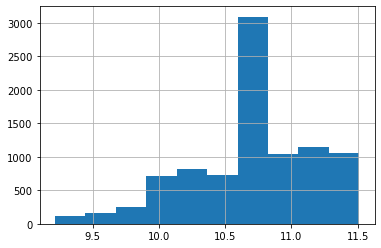

In [124]:
variable_customer_df['income_transformed'] = variable_customer_df['income'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['income_transformed'] = variable_customer_df['income_transformed'].fillna(np.mean(variable_customer_df['income_transformed']))
variable_customer_df['income_transformed'].hist()
plt.show()


In [125]:
variable_customer_df['number_of_open_complaints'].mean()

0.38438800087584846

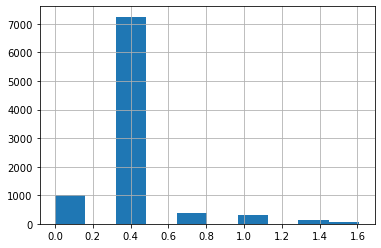

In [126]:
variable_customer_df['number_of_open_complaints_transformed'] = variable_customer_df['number_of_open_complaints'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['number_of_open_complaints_transformed'] = variable_customer_df['number_of_open_complaints_transformed'].fillna(np.mean(variable_customer_df['number_of_open_complaints_transformed']))
variable_customer_df['number_of_open_complaints_transformed'].hist()
plt.show()


In [127]:
variable_customer_df['number_of_policies'].mean()

2.9661703525290126

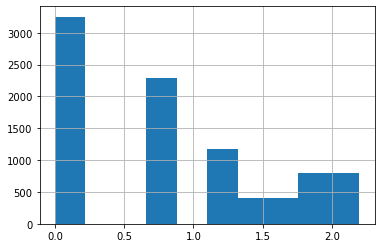

In [128]:
variable_customer_df['number_of_policies_transformed'] = variable_customer_df['number_of_policies'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['number_of_policies_transformed'] = variable_customer_df['number_of_policies_transformed'].fillna(np.mean(variable_customer_df['number_of_policies_transformed']))
variable_customer_df['number_of_policies_transformed'].hist()
plt.show()


In [129]:
variable_customer_df['months_since_last_claim'].mean()

15.097000218962119

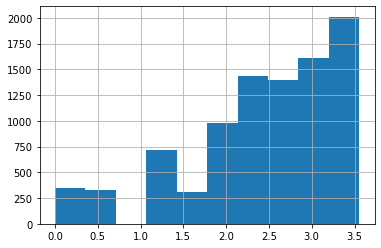

In [130]:
variable_customer_df['months_since_last_claim_transformed'] = variable_customer_df['months_since_last_claim'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['months_since_last_claim_transformed'] = variable_customer_df['months_since_last_claim_transformed'].fillna(np.mean(variable_customer_df['months_since_last_claim_transformed']))
variable_customer_df['months_since_last_claim_transformed'].hist()
plt.show()


In [131]:
variable_customer_df['months_since_policy_inception'].mean()

48.064593825268226

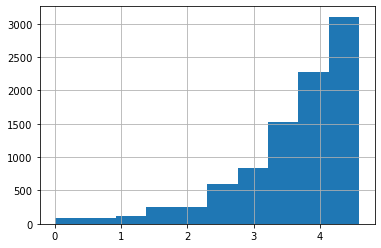

In [132]:
variable_customer_df['months_since_policy_inception_transformed'] = variable_customer_df['months_since_policy_inception'].apply(log_transfom_clean)

# replace NaNs with mean of transformed data
variable_customer_df['months_since_policy_inception_transformed'] = variable_customer_df['months_since_policy_inception_transformed'].fillna(np.mean(variable_customer_df['months_since_policy_inception_transformed']))
variable_customer_df['months_since_policy_inception_transformed'].hist()
plt.show()
